### Step 1: Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Step 2: Load and Explore the Dataset

Now we have to first explore and understand the data before we find the patterns in the data and build the model

In [16]:
df = pd.read_csv("Titanic-Dataset.csv")
print(df.head())
print(df.info())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

### Step 3: Data Pre-Preprocessing
1. Not all the columns are required for model building, these columns do not contribute much in the final decision, e.g "PassengerId", "Name", "Ticket", "Cabin"
2. Also Columns like "Age", "Embarked" contain missing data. So also have to fill those. I am using strategies like median and mode
3. Also categorical data such as "Sex" and "Embarked" should be encoded

In [17]:
any(df["Age"].isna()) # contains missing data

True

In [18]:
any(df["Embarked"].isna()) # contains missing data

True

In [19]:
# Drop columns not useful for prediction
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Fill missing 'Age' with median
df.fillna({"Age" : df['Age'].median()}, inplace=True)

# Fill missing 'Embarked' with the mode
df.fillna({"Embarked" : df['Embarked'].mode()[0]}, inplace=True)

# Encode categorical variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # male=1, female=0
df['Embarked'] = le.fit_transform(df['Embarked'])  # S=2, C=0, Q=1


### Step 4: Feature Selection & Splitting Data
1. Lets take "Survived" as dependent feature
2. And the rest is independent feature

In [22]:
X = df.drop('Survived', axis=1)
y = df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 5: Model Building & Training 
I am using random forest classifier for this one. It basically builds multiple decision trees (hence "forest"). Each tree is trained on a random subset of the training data.
At the prediction time, each tree gives a "vote", and the majority cote decides the final output.

In [24]:

# n_estimator is the number of decision trees used
# random_state is the random seed, can be any value, used so that the 
# results are reproducible
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Step 6: Evaluation
Now the model is evaluated on the test_data and plotted

Accuracy: 0.8212290502793296

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



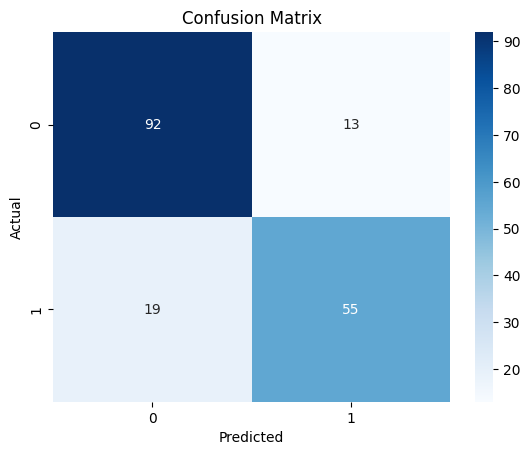

In [25]:
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Conclusion
In this project, we developed a Random Forest-based classification model to predict passenger survival on the Titanic using features like age, sex, fare, and class. After data preprocessing and model training:

The model achieved an accuracy of ~82% on the test data.

The confusion matrix indicates:

92 true negatives (correctly predicted not survived)

55 true positives (correctly predicted survived)

13 false positives and 19 false negatives

The precision and recall values suggest the model performs slightly better at identifying non-survivors than survivors, which is common in imbalanced datasets.